In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'C:\Users\Admin\Desktop\House price prediction ml\house price prediction\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,5650,1180,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,7242,2170,400
2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,10000,770,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,5000,1050,910
4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,8080,1680,0


In [3]:
data.shape

(21613, 21)

In [4]:
data.drop('id',axis=1,inplace=True)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  yr_built       21613 non-null  int64  
 11  yr_renovated   21613 non-null  int64  
 12  zipcode        21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
 15  sqft_living15  21613 non-null  int64  
 16  sqft_lot15     21613 non-null  int64  
 17  sqft_lot       21613 non-null  int64  
 18  sqft_a

In [6]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_lot,sqft_above,sqft_basement
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,1.510697e+04,1788.390691,291.509045
std,3.673622e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,4.142051e+04,828.090978,442.575043
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,5.200000e+02,290.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,5.040000e+03,1190.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,7.618000e+03,1560.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.068800e+04,2210.000000,560.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.651359e+06,9410.000000,4820.000000


In [7]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_lot',
       'sqft_above', 'sqft_basement'],
      dtype='object')

In [8]:
data.drop(['zipcode', 'lat', 'long'],axis=1,inplace=True)

In [9]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
yr_built         0
yr_renovated     0
sqft_living15    0
sqft_lot15       0
sqft_lot         0
sqft_above       0
sqft_basement    0
dtype: int64

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

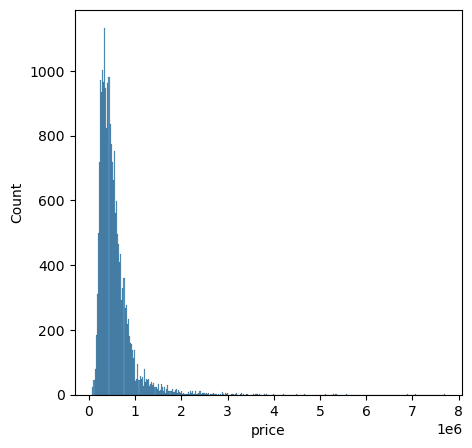

In [10]:
plt.figure(figsize=(5,5))
sns.histplot(data['price'])

In [11]:
import plotly.express as px
px.histogram(data['price'])


In [12]:
import plotly.express as px
px.box(data['price'])

<Axes: xlabel='bedrooms', ylabel='count'>

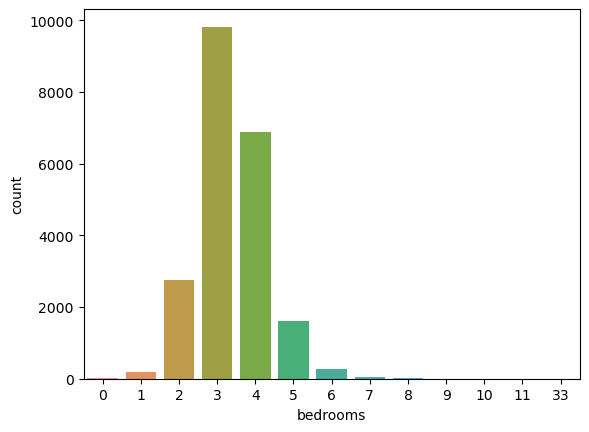

In [13]:
plt.figure()
sns.countplot(x=data['bedrooms'])

<Axes: xlabel='bedrooms', ylabel='price'>

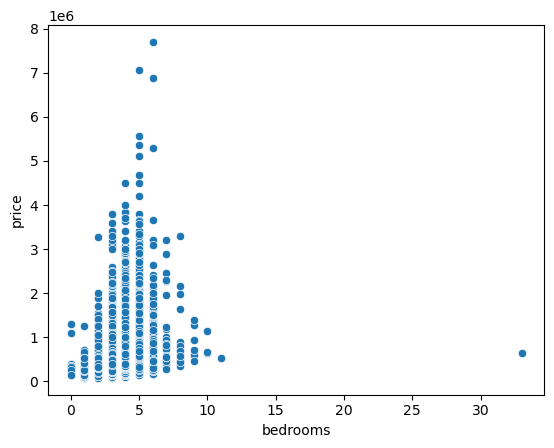

In [14]:
plt.figure()
sns.scatterplot(x=data['bedrooms'],y=data['price'])

<Axes: xlabel='age', ylabel='price'>

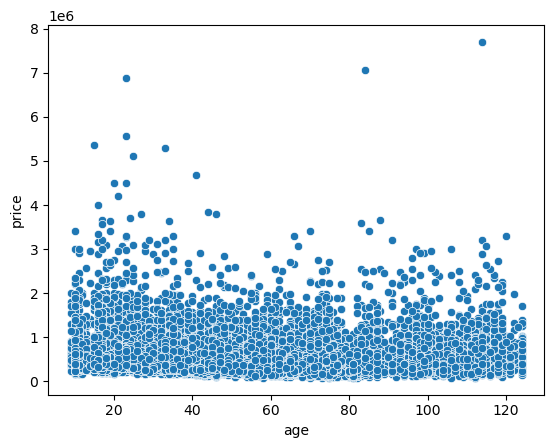

In [15]:
data['age']=data['yr_built'].apply(lambda x:2024-x)
plt.figure()
sns.scatterplot(x=data['age'],y=data['price'])

<Axes: xlabel='sqft_living', ylabel='price'>

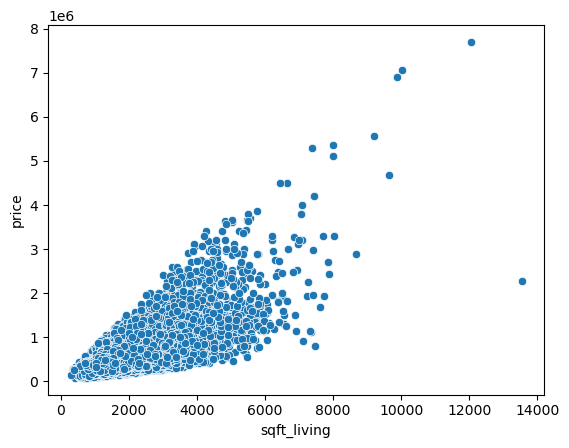

In [16]:
plt.figure()
sns.scatterplot(x=data['sqft_living'],y=data['price'])

In [17]:
columns_to_drop = ['id', 'zipcode', 'lat', 'long', 'date']
data.drop(columns=[col for col in columns_to_drop if col in data.columns], inplace=True)


In [18]:
x=data.drop('price',axis=1)
y=data['price']

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=2)

In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
params = {'alpha': [0.1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [22]:
best_ridge = grid_search.best_estimator_

In [23]:
y_pred = best_ridge.predict(x_test)

In [24]:
from sklearn import metrics


mse = metrics.mean_squared_error(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = best_ridge.score(x_test, y_test)

In [25]:
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 139541.69094559166
Mean Squared Error: 45592158966.04895
Root Mean Squared Error: 213523.20474845104
R-squared: 0.6738201671321389


In [26]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())

         Actual     Predicted
6638   735000.0  6.590179e+05
7366  1150000.0  1.436512e+06
3158   350500.0  3.229633e+05
9117   860000.0  1.176666e+06
3392   122000.0  1.899704e+05


In [27]:
print("Model Coefficients:", best_ridge.coef_)
print("Model Intercept:", best_ridge.intercept_)

Model Coefficients: [-36648.42214626  34138.76946617  76941.86260303  16195.67512059
  48919.99500108  31683.97138321  13414.38502073 137399.4976021
 -51626.34143453   6139.14074356  18236.77704275 -13612.00074444
  -1633.00591716  64292.97108582  39374.39382385  51626.34143453]
Model Intercept: 540887.3867396316


##Random Forest Model

In [28]:
### Random Forest Model ###
from sklearn.ensemble import RandomForestRegressor


rf = RandomForestRegressor(random_state=42)
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [29]:
# Best Random Forest model
best_rf = rf_grid.best_estimator_


In [30]:

y_pred_rf = best_rf.predict(x_test)

In [31]:
# Evaluation metrics
mse_rf = metrics.mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = best_rf.score(x_test, y_test)

print("\n### Random Forest ###")
print(f"Random Forest Best Params: {rf_grid.best_params_}")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")
print(f"R-squared: {r2_rf}")


### Random Forest ###
Random Forest Best Params: {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 300}
Mean Squared Error: 35700901518.70822
Root Mean Squared Error: 188946.82193333717
R-squared: 0.7445851577400443


In [32]:
from sklearn.ensemble import GradientBoostingRegressor


gb = GradientBoostingRegressor(random_state=42)
gb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb_grid = GridSearchCV(gb, gb_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid.fit(x_train, y_train)

best_gb = gb_grid.best_estimator_

y_pred_gb = best_gb.predict(x_test)

# Evaluation metrics
mse_gb = metrics.mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = best_gb.score(x_test, y_test)

In [34]:
print("\n### Gradient Boosting ###")
print(f"Gradient Boosting Best Params: {gb_grid.best_params_}")
print(f"Mean Squared Error: {mse_gb}")
print(f"Root Mean Squared Error: {rmse_gb}")
print(f"R-squared: {r2_gb}")


### Gradient Boosting ###
Gradient Boosting Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Mean Squared Error: 35655942453.72107
Root Mean Squared Error: 188827.81165315947
R-squared: 0.7449068082307422
